In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
print("Brakujące dane:\n", df.isnull().sum())
print(df.describe())
print(df.info())

Brakujące dane:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
<class 'pandas.core.frame.DataFrame

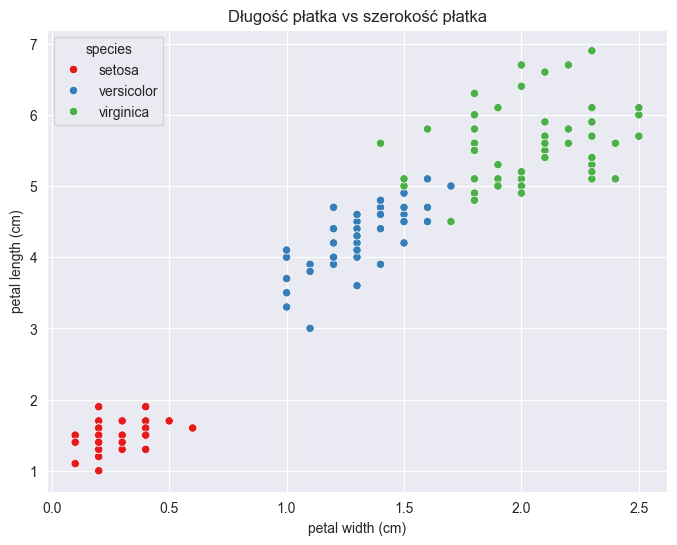

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='species', palette='Set1')
plt.title("Długość płatka vs szerokość płatka")
plt.show()


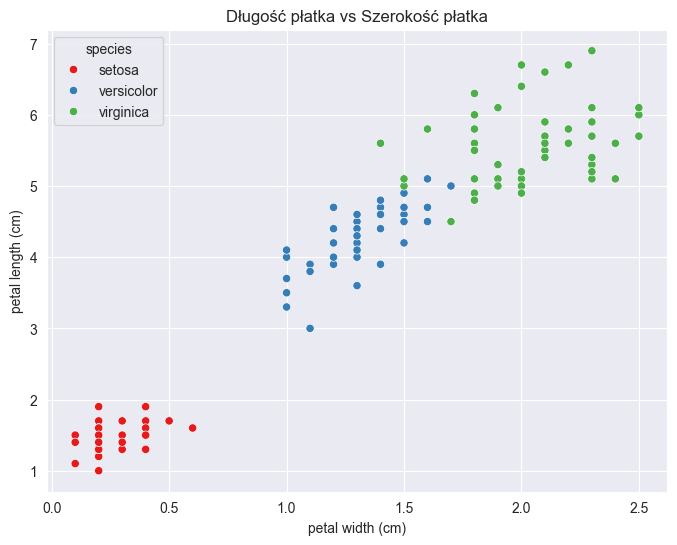

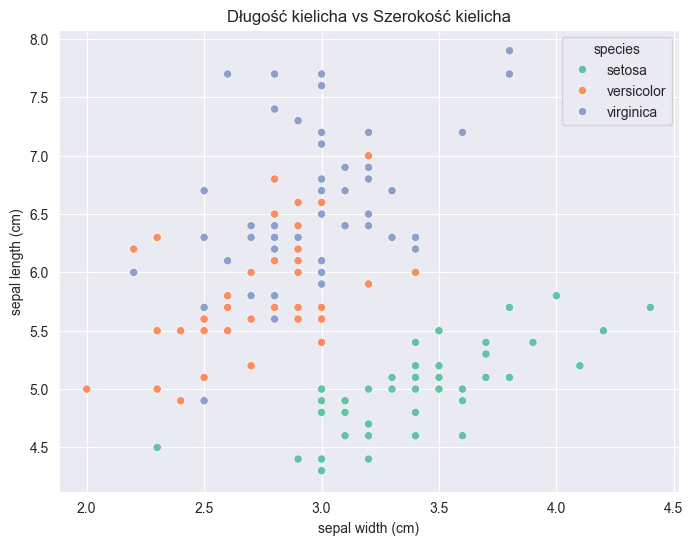

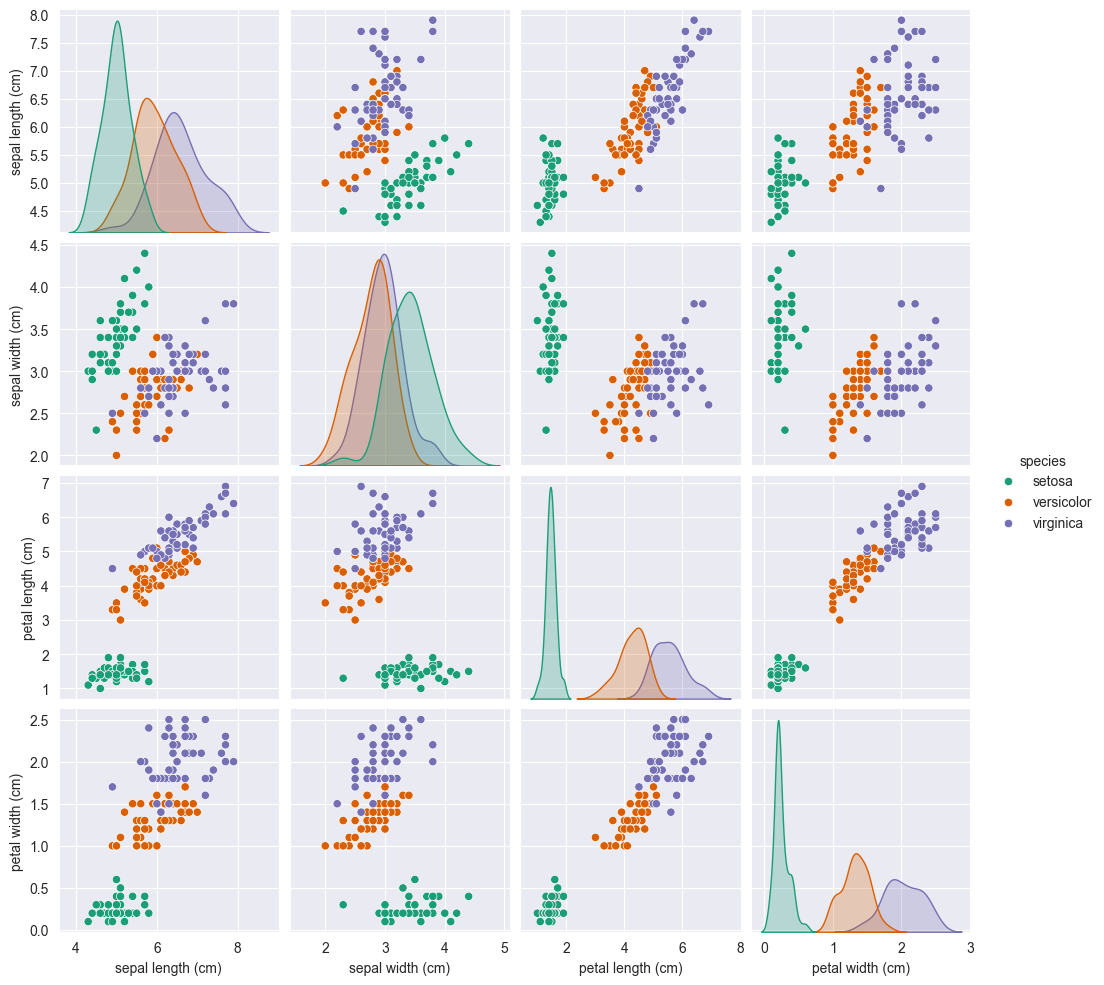

ValueError: could not convert string to float: np.str_('setosa')

<Figure size 1000x800 with 0 Axes>

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='species', palette='Set1')
plt.title("Długość płatka vs Szerokość płatka")
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal width (cm)', y='sepal length (cm)', hue='species', palette='Set2')
plt.title("Długość kielicha vs Szerokość kielicha")
plt.show()
sns.pairplot(df, hue='species', palette='Dark2')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa korelacji dla cech Iris")
plt.show()

In [8]:
df['is_virginica'] = df['species'].apply(lambda x: 1 if x == "virginica" else 0)

X1 = df[['petal width (cm)']]
y1 = df['is_virginica']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=101)
log_reg = LogisticRegression(random_state=101)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=101)

In [10]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_pred_proba = log_reg.predict_proba(X_new)[:, 1]

C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\supervised2\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:

decision_boundary = X_new[y_pred_proba >= 0.5][0]

print(f"Granica decyzyjna (szerokość płatka dla Iris virginica): {decision_boundary[0]:.2f}")


Granica decyzyjna (szerokość płatka dla Iris virginica): 1.67


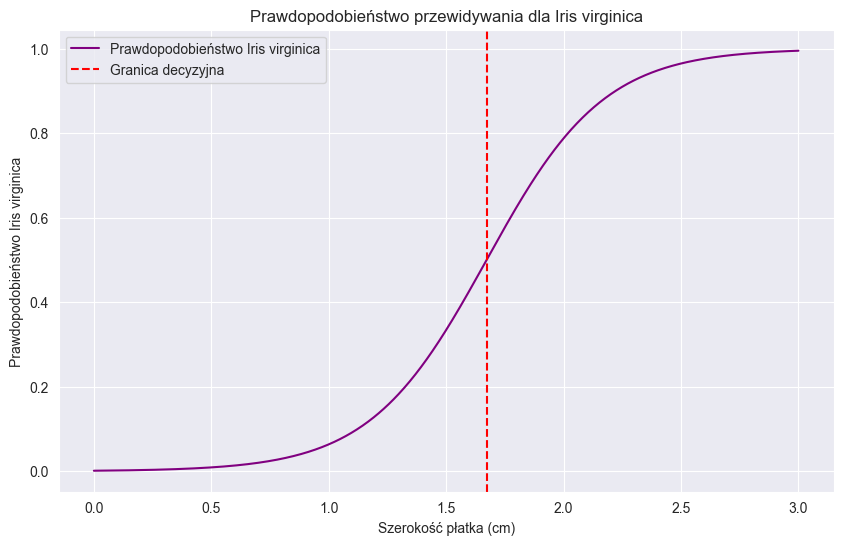

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(X_new, y_pred_proba, label="Prawdopodobieństwo Iris virginica", color="purple")
plt.axvline(x=decision_boundary[0], color="red", linestyle="--", label="Granica decyzyjna")
plt.xlabel("Szerokość płatka (cm)")
plt.ylabel("Prawdopodobieństwo Iris virginica")
plt.title("Prawdopodobieństwo przewidywania dla Iris virginica")
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [15]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.drop(columns=['species'])
y = df['species']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
param_grid = {
    'C': np.logspace(0, 4, 10),
    'penalty': ['l1', 'l2']
}

log_reg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=101)

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najlepsze parametry: ", grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\supervised2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\supervised2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\supervised2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value

Najlepsze parametry:  {'C': np.float64(21.544346900318832), 'penalty': 'l1'}


In [18]:
best_log_reg.fit(X_train, y_train)

C:\Users\tomek\Documents\MAGISTERSKIE\3sem\Playground5.0\supervised2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(21.544346900318832), multi_class='ovr',
                   penalty='l1', random_state=101, solver='liblinear')

In [19]:
y_pred = best_log_reg.predict(X_test)

Raport z klasyfikacji:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



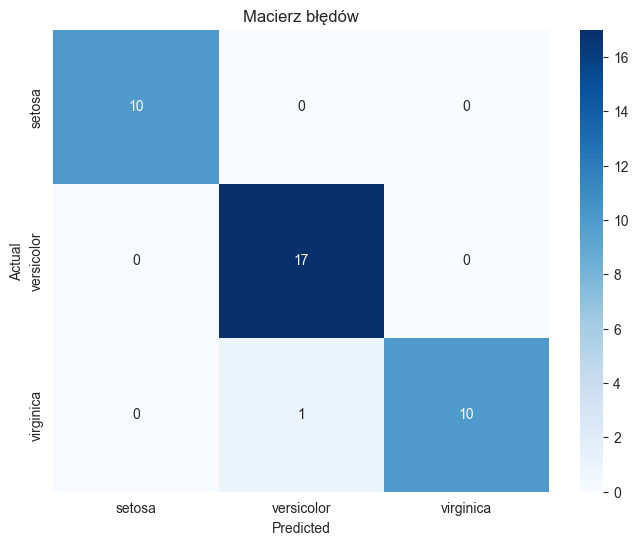

In [20]:
print("Raport z klasyfikacji:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Macierz błędów")
plt.show()

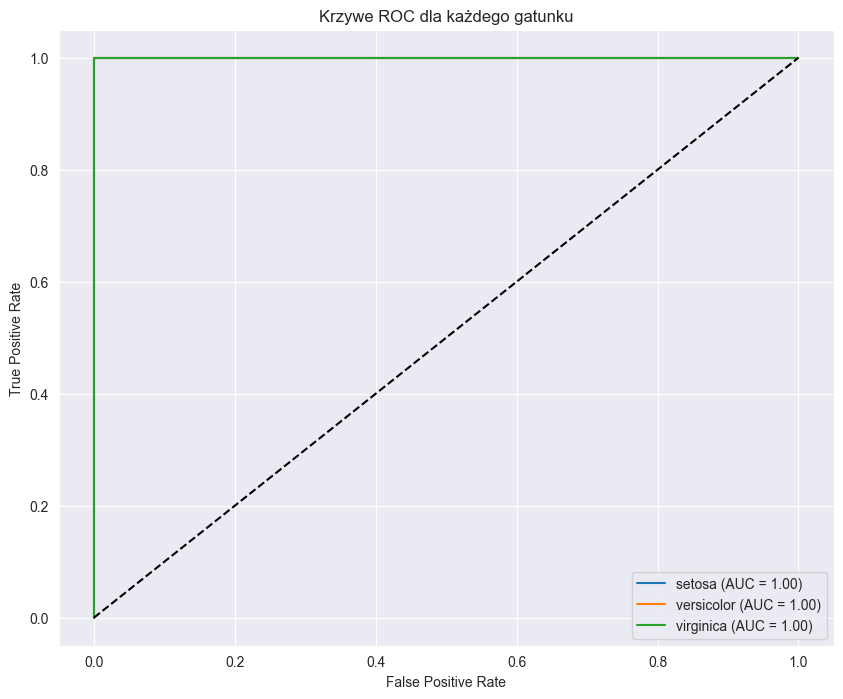

In [21]:
plt.figure(figsize=(10, 8))
for i in range(3):
    y_test_bin = (y_test == i).astype(int)  
    y_pred_prob = best_log_reg.predict_proba(X_test)[:, i]
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{iris.target_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Krzywe ROC dla każdego gatunku")
plt.legend()
plt.show()

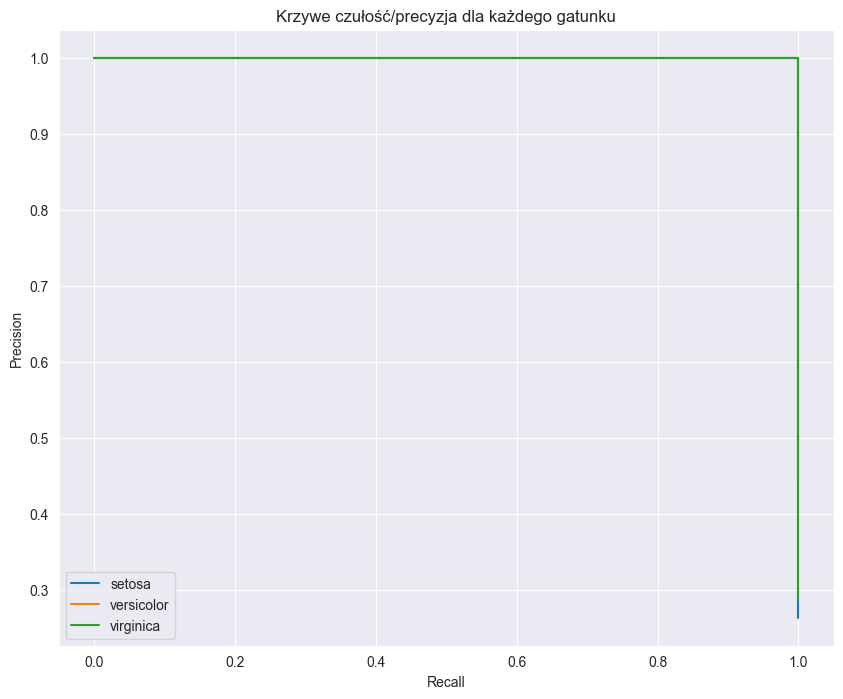

In [22]:

plt.figure(figsize=(10, 8))
for i in range(3):
    y_test_bin = (y_test == i).astype(int)  
    y_pred_prob = best_log_reg.predict_proba(X_test)[:, i]
    precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_prob)
    plt.plot(recall, precision, label=f"{iris.target_names[i]}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Krzywe czułość/precyzja dla każdego gatunku")
plt.legend()
plt.show()


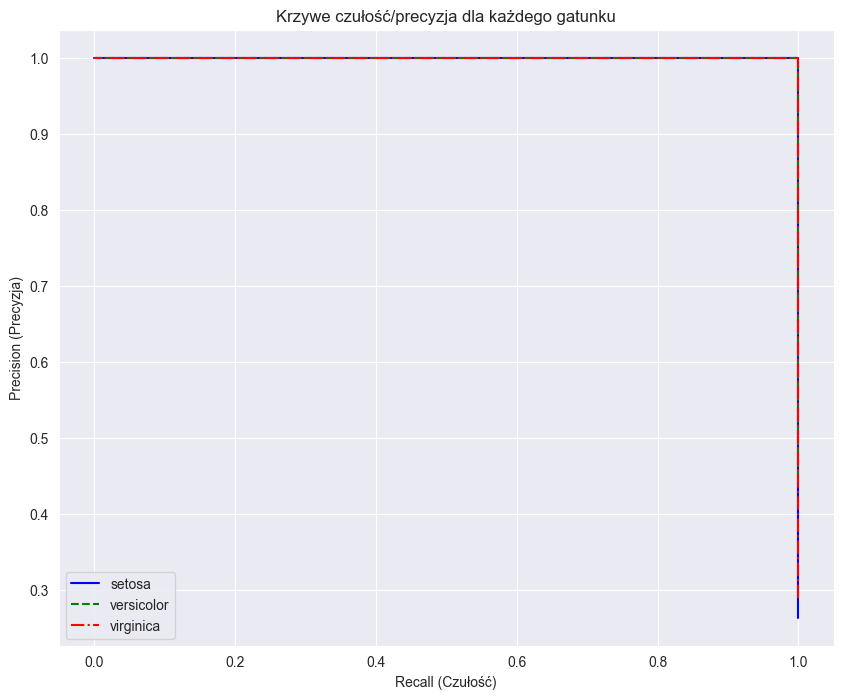

In [23]:
# Krzywe czułość/precyzja dla każdej klasy
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r']  # Kolory dla każdego gatunku
line_styles = ['-', '--', '-.']  # Style linii dla lepszej widoczności

for i in range(3):
    y_test_bin = (y_test == i).astype(int)  # Binary indicator for each class
    y_pred_prob = best_log_reg.predict_proba(X_test)[:, i]
    
    # Obliczenie krzywych precyzji i czułości
    precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_prob)
    plt.plot(recall, precision, color=colors[i], linestyle=line_styles[i], label=f"{iris.target_names[i]}")

plt.xlabel("Recall (Czułość)")
plt.ylabel("Precision (Precyzja)")
plt.title("Krzywe czułość/precyzja dla każdego gatunku")
plt.legend()
plt.show()


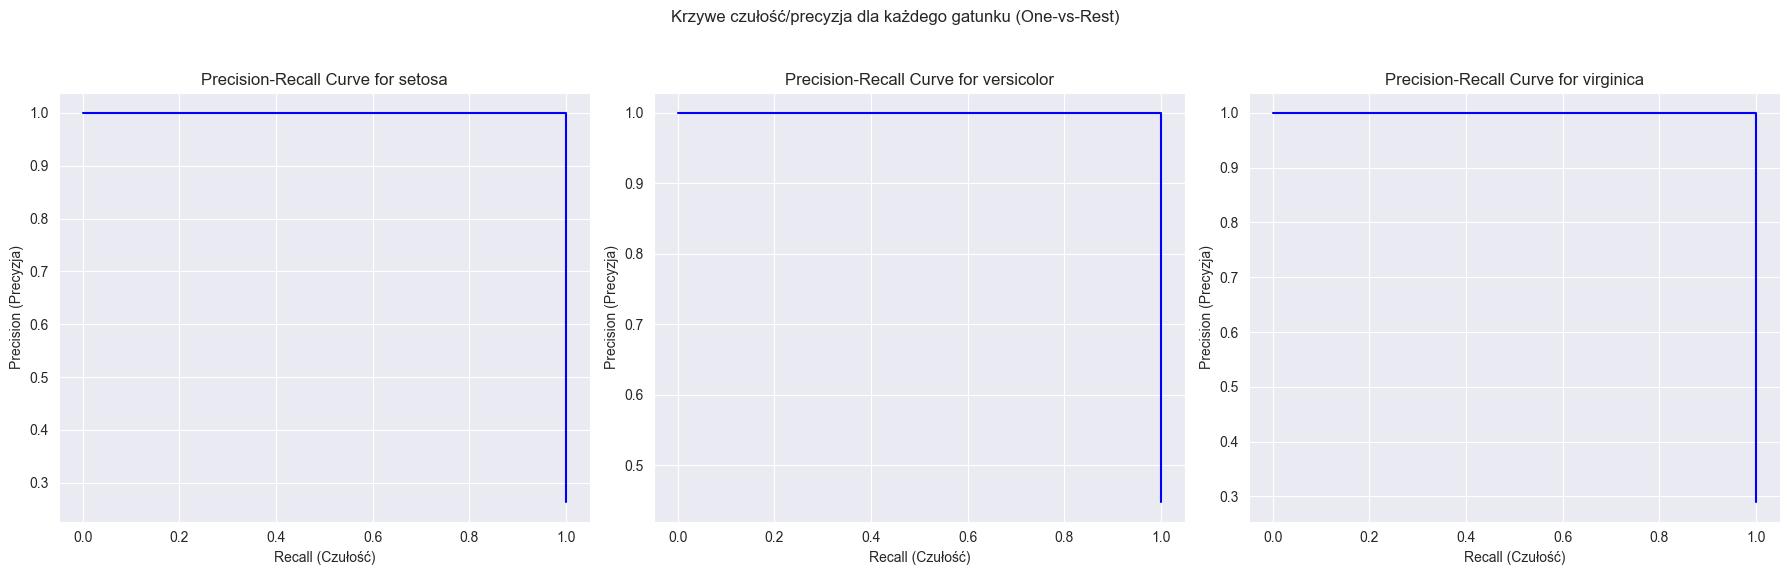